In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

# KNN Classifiers

## Instructions
Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct.

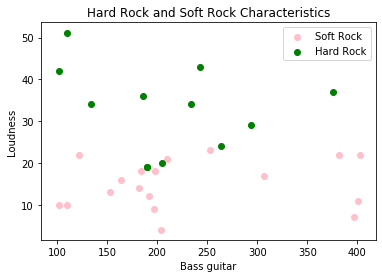

In [9]:
from sklearn.neighbors import KNeighborsClassifier
music = pd.DataFrame()

# Some data to play with.
music['bass_guitar'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are hard rock or not.
music['hardrock'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['hardrock'] == 1].bass_guitar,
    music[music['hardrock'] == 1].loudness,
    color='pink'
)
plt.scatter(
    music[music['hardrock'] == 0].bass_guitar,
    music[music['hardrock'] == 0].loudness,
    color='green'
)
plt.legend(['Soft Rock', 'Hard Rock'])
plt.title('Hard Rock and Soft Rock Characteristics')
plt.xlabel('Bass guitar')
plt.ylabel('Loudness')
plt.show()

In [11]:
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'bass_guitar']]
Y = music.hardrock
neighbors.fit(X,Y)

## Predict for a song with 30 units of loudness that's 300 notes of bass guitar.
neighbors.predict([[10, 300]])

array([1])

### Observation:
Looks like our model is predicting that 30 units of loudness, 300 notes of bass guitar is not hard rock. 

In [13]:
#Changed our nearest neighbor to 6.
neighbors = KNeighborsClassifier(n_neighbors=6)
X = music[['loudness', 'bass_guitar']]
Y = music.hardrock
neighbors.fit(X,Y)

## Predict for a song with 30 units of loudness that's 300 notes of bass guitar.
neighbors.predict([[10, 300]])

array([0])

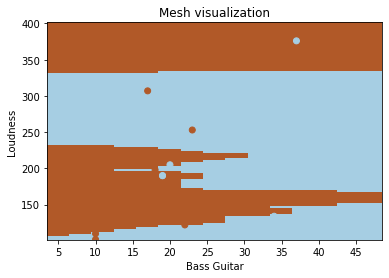

In [14]:
# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 3.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Bass Guitar')
plt.ylabel('Loudness')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()